In [18]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns

In [2]:
#First Look at the fits file
fits_file = Table.read('nsa_v0_1_2.fits')
print(fits_file)

      IAUNAME                  SUBDIR           ...  PLUG_RA    PLUG_DEC 
------------------- --------------------------- ... --------- -----------
J094651.40-010228.5 09h/m00/J094651.40-010228.5 ... 146.71421  -1.0413043
J094631.60-005917.7 09h/m00/J094631.60-005917.7 ... 146.63167 -0.98827781
J094842.33-002114.4 09h/m00/J094842.33-002114.4 ... 147.17639 -0.35405684
J094919.08+000144.0 09h/p00/J094919.08+000144.0 ... 147.32951 0.028902695
J094725.62-001626.6 09h/m00/J094725.62-001626.6 ... 146.85676 -0.27404021
J094446.23-004118.2 09h/m00/J094446.23-004118.2 ... 146.19262 -0.68840099
J094401.87-003832.1 09h/m00/J094401.87-003832.1 ... 146.00779 -0.64227163
J094622.67-000759.3 09h/m00/J094622.67-000759.3 ... 146.59449 -0.13317431
J094628.56-002603.4 09h/m00/J094628.56-002603.4 ... 146.61904 -0.43432227
J094700.41-002430.2 09h/m00/J094700.41-002430.2 ...  146.7517 -0.40839151
                ...                         ... ...       ...         ...
J143120.15-014503.5 14h/m00/J143120.15

In [3]:
#Look at the column names to determine which data to use
print(fits_file.columns)

<TableColumns names=('IAUNAME','SUBDIR','RA','DEC','ISDSS','INED','ISIXDF','IALFALFA','IZCAT','ITWODF','MAG','Z','ZSRC','SIZE','RUN','CAMCOL','FIELD','RERUN','XPOS','YPOS','ZLG','ZDIST','ZDIST_ERR','NSAID','NMGY','NMGY_IVAR','OK','RNMGY','ABSMAG','AMIVAR','EXTINCTION','KCORRECT','KCOEFF','MTOL','B300','B1000','METS','MASS','XCEN','YCEN','NPROF','PROFMEAN','PROFMEAN_IVAR','QSTOKES','USTOKES','BASTOKES','PHISTOKES','PETROFLUX','PETROFLUX_IVAR','FIBERFLUX','FIBERFLUX_IVAR','BA50','PHI50','BA90','PHI90','SERSICFLUX','SERSICFLUX_IVAR','SERSIC_N','SERSIC_BA','SERSIC_PHI','ASYMMETRY','CLUMPY','DFLAGS','AID','PID','DVERSION','PROFTHETA','PETROTHETA','PETROTH50','PETROTH90','SERSIC_TH50','OBJNO','PLATE','FIBERID','MJD','COEFF','VDISP','D4000','D4000ERR','FA','FAERR','S2FLUX','S2FLUXERR','S2EW','S2EWERR','S2VMEAS','S2VMERR','S2RATIO','HAFLUX','HAFLUXERR','HAEW','HAEWERR','HAVMEAS','HAVMERR','N2FLUX','N2FLUXERR','N2EW','N2EWERR','N2VMEAS','N2VMERR','HBFLUX','HBFLUXERR','HBEW','HBEWERR','HBVMEAS',

In [4]:
#Load the fits file into python
hdu = fits.open('nsa_v0_1_2.fits')[1]
nsa_data = hdu.data

In [5]:
#Use the RA and DEC columns, which can be used for downloading images of each galaxy
RA = np.array((nsa_data['RA']))
DEC = np.array((nsa_data['DEC']))

In [6]:
#Print the RA and DEC columns and their lenght, to make sure that the data works (they must be the same length)
print(RA)
print(DEC)
print(len(RA))
print(len(DEC))

[146.71420879 146.63173521 147.17644695 ... 222.91867615 219.74879625
   5.72621016]
[ -1.04128157  -0.98835486  -0.35403042 ...  -0.30738555  -2.65469736
 -12.29463946]
145155
145155


In [7]:
#Create a string of random integers from one of the integers in the length of the RA/DEC columns
rand_int = np.random.randint(0,len(RA),size = 10)
print(rand_int)

[ 74831  19765 117835 135015  22710  86430  93370  46160  46633  12871]


In [8]:
#A function for asking the legacy survey website to give us and image at a specific location besed ona given RA and DEC value
def download_images(RA, DEC, pixscale=0.2, layer='sdss', size=256, out=None):
    url = f'http://legacysurvey.org/viewer/cutout.fits/?ra={RA}&dec={DEC}&pixscale={pixscale}&layer={layer}&size={size}'  
    content = requests.get(url).content  
    if out is not None:  
        if not out.lower().endswith('.fits'):  
            out += '.fits'  
        with open(out, 'wb') as f:  
            f.write(content)  
    return

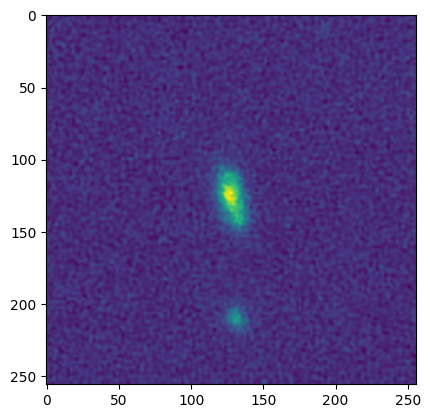

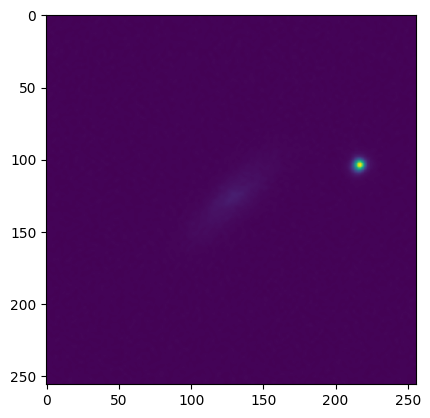

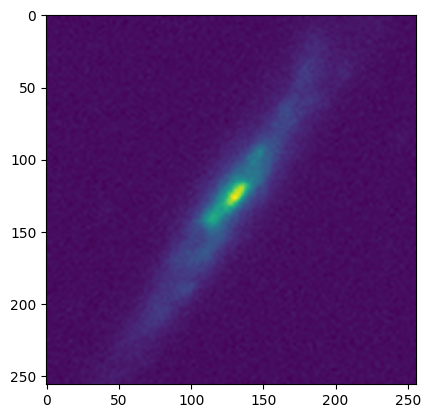

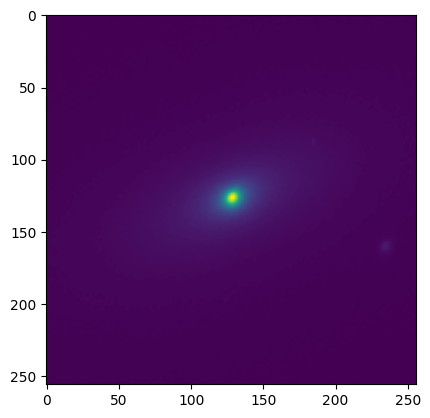

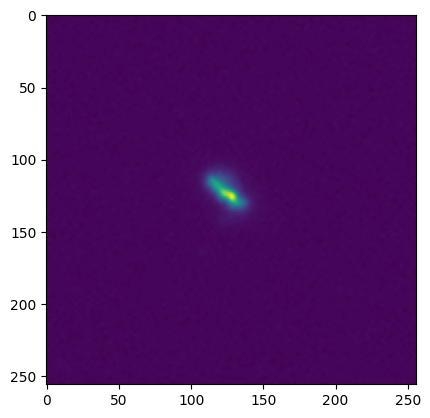

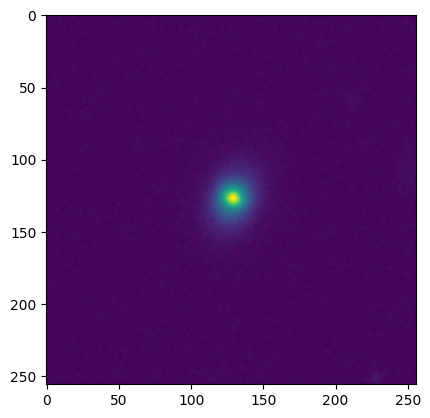

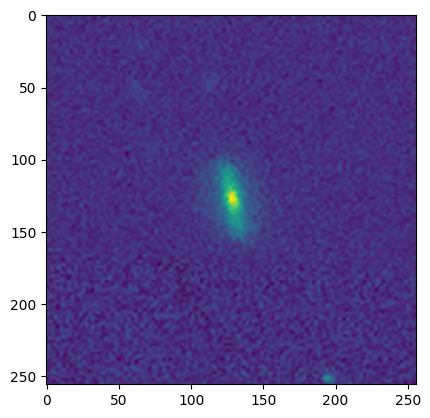

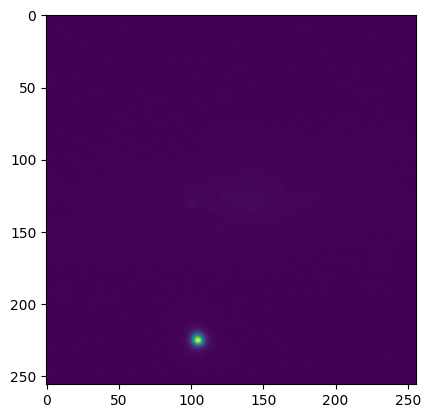

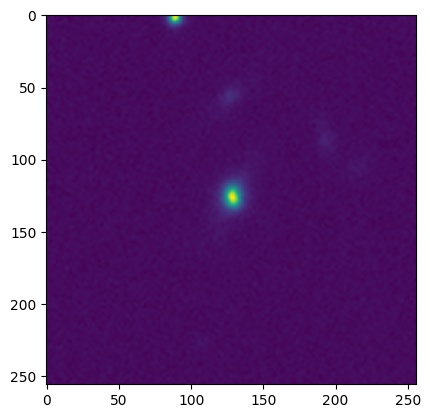

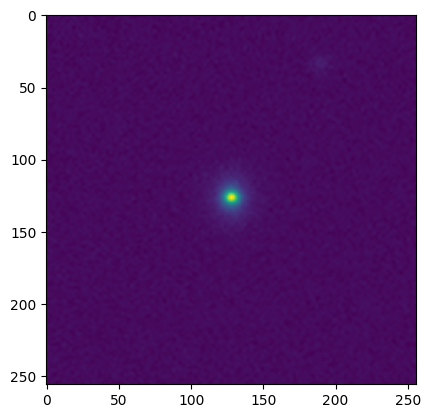

In [9]:
#For each of the 10 randomly selected galaxies, download an image of the galaxy and open it inside this file
for i in rand_int:
    download_images(RA[i], DEC[i], out=f'/Users/griff/Documents/astro_98_2024/astro_98_final_project/galaxy_images/{RA[i]}_{DEC[i]}AGN.fits')
    with fits.open(f'/Users/griff/Documents/astro_98_2024/astro_98_final_project/galaxy_images/{RA[i]}_{DEC[i]}AGN.fits') as hdu:
        image_AGN = hdu[0].data
        plt.figure()
        plt.imshow(image_AGN[0])

In [10]:
#Print the distance (column  zdist) of each of the ten galaxies
ZDIST = np.array((nsa_data['ZDIST']))
for i in rand_int:
    print(ZDIST[i])

0.05472953
0.030624721
0.016456543
0.011529147
0.031096686
0.05214239
0.028387882
0.007613165
0.028033618
0.04607427


In [14]:
#Average the distance for all datapoints
sum_of_distance = 0
for i in rand_int:
    sum_of_distance += ZDIST[i]
average_distance = sum_of_distance / len(rand_int)
print(average_distance)

0.03066879496909678


In [ ]:
#This number is the average distance away from us (in Mega-parsecs) of the collection of galaxies

In [16]:
#Print the mass of each of the ten galaxies
MASS = np.array((nsa_data['MASS']))
for i in rand_int:
    print(MASS[i])

1179206700.0
2157273900.0
2553080800.0
53095510000.0
192150320.0
17918860000.0
853192260.0
78315770.0
609013440.0
5635930000.0


In [17]:
#Average the mass for all datapoints
sum_of_mass = 0
for i in rand_int:
    sum_of_mass += MASS[i]
average_mass = sum_of_mass / len(rand_int)
print(average_mass)

8427253252.0


In [ ]:
#This number is the average mass of the collection of the galaxies (in a unit that I do not know)

In [19]:
distance = []
mass = []
for i in rand_int:
    distance.append(ZDIST[i])
for i in rand_int:
    mass.append(MASS[i])

<function matplotlib.pyplot.show(close=None, block=None)>

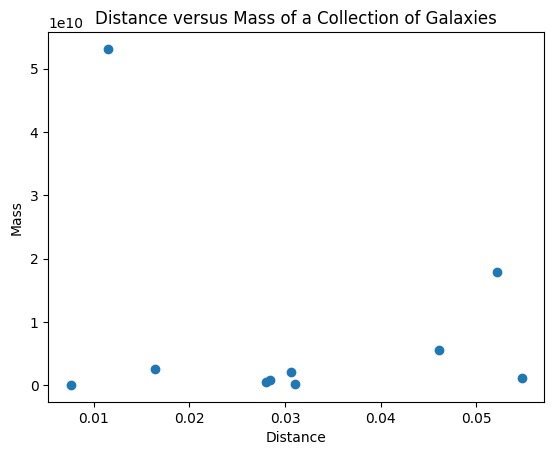

In [20]:
#Plotting a graph of Distance versus Mass
plt.scatter(x=distance, y=mass)
plt.title("Distance versus Mass of a Collection of Galaxies")
plt.xlabel("Distance")
plt.ylabel("Mass")
plt.show